In [9]:
# import Qiskit
from qiskit import IBMQ, QuantumCircuit, Aer, execute
from qiskit.providers.ibmq import least_busy
from qiskit.visualization import plot_histogram
from qiskit.tools.jupyter import *

# import api token
apitoken = 'c19e2bcf0e6eb22d33dafe16d433fea46c9f1c2fd61904a781aef17f7c548be2c9136c973f24a1633cc12b5e9343e1fb066168999ba0d0f8e3144147165fe9a8'
try :
    IBMQ.enable_account(token=apitoken)
except:
    pass
provider = IBMQ.get_provider(project='default')

# U1 Gate

From the [documentation](https://qiskit.org/documentation/stubs/qiskit.circuit.library.U1Gate.html?highlight=u1%20gate#qiskit.circuit.library.U1Gate) of Qiskit, is said that the **U1** gate can be implemented with zero error rate and duration by framechanges. 
A circuit consists of a U1 gate and a classical measuring channel is illustrated as below.
The matrix representation of U1 gate reads
$$
U_1(\theta)
=
\begin{pmatrix}
 1 & 0 \\
 0 & e^{i\theta}
\end{pmatrix}
$$
with a parameter $\theta$. Some special cases are:
1. $U_1(\pi) = Z$
2. $U_1(\pi/2) = S$
3. $U_1(\pi/4) = T$

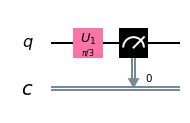

In [25]:
# create quantum circuit
import numpy as np
theta = np.pi / 3

circ = QuantumCircuit(1,1)
circ.u1(theta, [0])
circ.measure(0,0)

circ.draw('mpl')

### Simulator

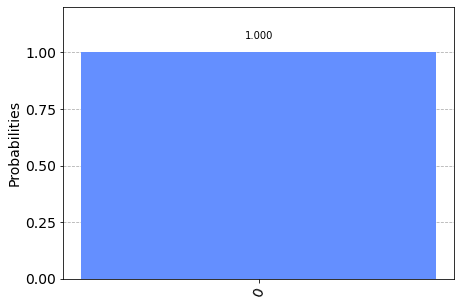

In [26]:
simulator = Aer.get_backend('qasm_simulator')

shots = 1024

job = execute(circ, backend=simulator, shots=shots)
counts = job.result().get_counts()

plot_histogram(counts)

### Real device

backend:  ibmq_vigo


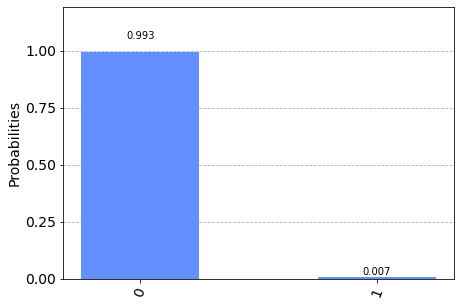

In [27]:
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 1 and 
                                       not x.configuration().simulator and x.status().operational==True))
print('backend: ', backend)

job = execute(circ, backend=backend, shots=shots)
counts = job.result().get_counts()
plot_histogram(counts)

***Question*: Where does the small contribution come from?**